### BUSINESS UNDERSTANDING
With the growing trend of major companies investing in the movie industry, the client is interested in starting his own movie studio. However, without prior experience in the field, the client needs data-driven strategies. The task at hand is to analyze current box office trends and identify which types of films are performing best. Having accurate revenue forecasts, genre performances, and other characteristics of films will assist in prioritizing for maximum success and profitability in the highly competitive entertainment market. 
Without this data, the company may struggle to effectively identify the most profitable genres, budgets, or release windows, and determine which genres resonate best with local and foreign audiences.

#### BUSINESS OBJECTIVES
To help the client make a strategic decision on launching this new endeavor, it is essential to address several key questions that will shape our analysis. The primary objectives of this analysis are to answer the following:

1. Which genre performs the best at the box office?
2. Which studio is the most popular, and what factors contribute to its success?
3. Do certain languages have a broader audience reach?
4. Who are the top-performing directors in the industry?
5. What role does the foreign market play in the industry's overall performance?
6. What is the optimal time of year to release a movie for maximum success?

#### SUCCESS CRITERIA



### DATA UNDERSTANDING
The data for this analysis was sourced from various movie platforms, including 'The Numbers,' 'Rotten Tomatoes,' 'TMDB Movies,' 'Bom Movies,' and an 'IMDB' database.

In [141]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from matplotlib.ticker import ScalarFormatter
import scipy.stats as stats
import sqlite3
import requests


In [142]:
#loading data

tnbudgets_df = pd.read_csv('tn.movie_budgets.csv')
tmdb_df = pd.read_csv('tmdb.movies.csv')
rtinfo = pd.read_csv('rt.movie_info.tsv', sep = '\t', skiprows=lambda x: x == 1378)
bom_movies= pd.read_csv('bom.movie_gross.csv')
conn = sqlite3.connect('im.db')
pd.read_sql("""SELECT *
            FROM sqlite_master""",conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [143]:
#fetching data from tmdb website to relate genre IDs with the genre names

# Defining my  API key after creating it by creating an account in TMDB
api_key = "0135236f1aaceb14241d05ec5221485b"  
# Getting the genre list from the TMDb API
url = f"https://api.themoviedb.org/3/genre/movie/list?api_key={api_key}&language=en-US"
response = requests.get(url)
if response.status_code == 200:
    genre_data = response.json()['genres']
    # Creating  a dictionary mapping genre_ids to genre names
    genre_dict = {genre['id']: genre['name'] for genre in genre_data}
    print("Genre Dictionary:", genre_dict)
else:
    print(f"Failed to fetch genres. Status Code: {response.status_code}")

Genre Dictionary: {28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}


In [145]:
#viewing the top 5 rows

tnbudgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [146]:
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_names
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"[Unknown, Unknown, Unknown, Unknown, Unknown, ..."
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"[Unknown, Unknown, Unknown, Unknown, Unknown, ..."
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"[Unknown, Unknown, Unknown, Unknown, Unknown, ..."
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"[Unknown, Unknown, Unknown, Unknown, Unknown, ..."
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"[Unknown, Unknown, Unknown, Unknown, Unknown, ..."


In [147]:
rtinfo.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [148]:
bom_movies.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [149]:
#more information on the data

tnbudgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [150]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
 10  genre_names        26517 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 2.2+ MB


In [151]:
rtinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1559 non-null   int64 
 1   synopsis      1497 non-null   object
 2   rating        1556 non-null   object
 3   genre         1551 non-null   object
 4   director      1360 non-null   object
 5   writer        1110 non-null   object
 6   theater_date  1200 non-null   object
 7   dvd_date      1200 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1529 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.3+ KB


In [152]:
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


From the above we can note that tmdb and tnbudgets datasets do not have any missing values. Also, some of the data are numerical but are categorised as objects.

### DATA PREPARATION AND DATA CLEANING

##### tnbudgets dataset

In [153]:
#changing all the currency values from objects to float

currency_cols = ['production_budget','domestic_gross','worldwide_gross']
for x in currency_cols:
    tnbudgets_df[x] = tnbudgets_df[x].astype(str).replace({'\$':'',',':''},regex = True)
    tnbudgets_df[x] = tnbudgets_df[x].astype(float)
    tnbudgets_df[x] = tnbudgets_df[x].round(0).astype(int)
tnbudgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [154]:
#check for duplicates

tnbudgets_df.duplicated().sum()

0

There are no duplicated entries

In [155]:
#dropping rows where worlwide gross revenue is 0 as they are not helpful in this analysis. 

tnbudgets_df = tnbudgets_df[tnbudgets_df['worldwide_gross'] != 0]
tnbudgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338


In [156]:
#dropping the id column because it is also not helpful in this analysis

tnbudgets_df = tnbudgets_df.drop('id', axis = 1)

In [157]:
#converting month and date into datetime

tnbudgets_df['release_date'] = pd.to_datetime(tnbudgets_df['release_date'])
tnbudgets_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,Avatar,425000000,760507625,-2147483648
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...
5775,2006-05-26,Cavite,7000,70071,71644
5776,2004-12-31,The Mongol King,7000,900,900
5778,1999-04-02,Following,6000,48482,240495
5779,2005-07-13,Return to the Land of Wonders,5000,1338,1338


In [158]:
#extracting months and years from the release date

tnbudgets_df['month'] = tnbudgets_df['release_date'].dt.month
tnbudgets_df['year'] = tnbudgets_df['release_date'].dt.year
tnbudgets_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year
0,2009-12-18,Avatar,425000000,760507625,-2147483648,12,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,2011
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,6,2019
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,5,2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,2017
...,...,...,...,...,...,...,...
5775,2006-05-26,Cavite,7000,70071,71644,5,2006
5776,2004-12-31,The Mongol King,7000,900,900,12,2004
5778,1999-04-02,Following,6000,48482,240495,4,1999
5779,2005-07-13,Return to the Land of Wonders,5000,1338,1338,7,2005


In [159]:
#calculating the profit made by each movie

tnbudgets_df['profit'] = (tnbudgets_df['worldwide_gross'] - tnbudgets_df['production_budget']).astype(int)
tnbudgets_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year,profit
0,2009-12-18,Avatar,425000000,760507625,-2147483648,12,2009,1722483648
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,2011,635063875
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,6,2019,-200237650
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,5,2015,1072413963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,2017,999721747
...,...,...,...,...,...,...,...,...
5775,2006-05-26,Cavite,7000,70071,71644,5,2006,64644
5776,2004-12-31,The Mongol King,7000,900,900,12,2004,-6100
5778,1999-04-02,Following,6000,48482,240495,4,1999,234495
5779,2005-07-13,Return to the Land of Wonders,5000,1338,1338,7,2005,-3662


In [160]:
#checking for outliers based on the profit

Q1 = tnbudgets_df['profit'].quantile(0.25)  
Q3 = tnbudgets_df['profit'].quantile(0.75)  
IQR = Q3 - Q1  

#outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#outliers
outliers = tnbudgets_df[(tnbudgets_df['profit'] < lower_bound) | (tnbudgets_df['profit'] > upper_bound)]
outliers

,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year,profit
0,2009-12-18,Avatar,425000000,760507625,-2147483648,12,2009,1722483648
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,2011,635063875
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,6,2019,-200237650
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,5,2015,1072413963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,2017,999721747
...,...,...,...,...,...,...,...,...
5117,1937-12-21,Snow White and the Seven Dwarfs,1488000,184925486,184925486,12,1937,183437486
5210,1976-11-21,Rocky,1000000,117235147,225000000,11,1976,224000000
5346,1942-08-13,Bambi,858000,102797000,268000000,8,1942,267142000
5406,1999-07-14,The Blair Witch Project,600000,140539099,248300000,7,1999,247700000


In [161]:
#dropping outliers because they represent one off situations where a movie did really well or very poorly

tnbudgets_dfclean = tnbudgets_df[(tnbudgets_df['profit'] >= lower_bound) & (tnbudgets_df['profit'] <= upper_bound)]
tnbudgets_dfclean

,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year,profit
11,2018-05-25,Solo: A Star Wars Story,275000000,213767512,393151347,5,2018,118151347
12,2013-07-02,The Lone Ranger,275000000,89302115,260002115,7,2013,-14997885
13,2012-03-09,John Carter,275000000,73058679,282778100,3,2012,7778100
23,2006-06-28,Superman Returns,232000000,200120000,374085065,6,2006,142085065
31,2012-05-18,Battleship,220000000,65233400,313477717,5,2012,93477717
...,...,...,...,...,...,...,...,...
5775,2006-05-26,Cavite,7000,70071,71644,5,2006,64644
5776,2004-12-31,The Mongol King,7000,900,900,12,2004,-6100
5778,1999-04-02,Following,6000,48482,240495,4,1999,234495
5779,2005-07-13,Return to the Land of Wonders,5000,1338,1338,7,2005,-3662


##### tmdb dataset

In [162]:
# Checking the top 10 most popular moives
most_popular = tmdb_df.nlargest(10, 'popularity')
print(most_popular[['title','popularity']])

                                             title  popularity
23811                       Avengers: Infinity War      80.773
11019                                    John Wick      78.123
23812            Spider-Man: Into the Spider-Verse      60.534
11020    The Hobbit: The Battle of the Five Armies      53.783
5179                                  The Avengers      50.289
11021                      Guardians of the Galaxy      49.606
20617                            Blade Runner 2049      48.571
23813                            Blade Runner 2049      48.571
23814  Fantastic Beasts: The Crimes of Grindelwald      48.508
23815                    Ralph Breaks the Internet      48.057


In [163]:
#checking whether the Blade Runner movie 2049 has the same information that is in popularity,vote count and average
blade_runner_info = tmdb_df[tmdb_df['title'] == 'Blade Runner 2049']
print(blade_runner_info)

       Unnamed: 0      genre_ids      id original_language     original_title  \
20617       20617  [878, 28, 53]  335984                en  Blade Runner 2049   
23813       23813  [878, 28, 53]  335984                en  Blade Runner 2049   

       popularity release_date              title  vote_average  vote_count  \
20617      48.571   2017-10-06  Blade Runner 2049           7.4        6679   
23813      48.571   2017-10-06  Blade Runner 2049           7.4        6679   

                                             genre_names  
20617  [Unknown, Unknown, Unknown, Unknown, Unknown, ...  
23813  [Unknown, Unknown, Unknown, Unknown, Unknown, ...  


In [164]:
#decided to  Group the data by title,release date and how many times it has appeared
title_release_counts = tmdb_df.groupby(['title', 'release_date']).size()

# Filtered the data for titles that appear more than once
duplicates_titles = title_release_counts[title_release_counts > 1]

print(duplicates_titles)


title                                           release_date
$ellebrity                                      2013-01-11      2
'85: The Greatest Team in Pro Football History  2018-01-29      2
1 Night                                         2017-02-10      2
10,000 km                                       2015-07-10      2
100 Streets                                     2016-06-08      2
                                                               ..
Your Name.                                      2017-04-07      2
Youth in Oregon                                 2017-02-03      2
Zama                                            2017-09-30      2
Zarafa                                          2012-11-11      2
Zoo                                             2018-06-08      2
Length: 1002, dtype: int64


In [165]:
# Droped duplicates so that i can only remain with title
tmdb_df.drop_duplicates(subset=['title', 'release_date'], keep='first', inplace=True)
print(tmdb_df)

       Unnamed: 0            genre_ids      id original_language  \
0               0      [12, 14, 10751]   12444                en   
1               1  [14, 12, 16, 10751]   10191                en   
2               2        [12, 28, 878]   10138                en   
3               3      [16, 35, 10751]     862                en   
4               4        [28, 878, 12]   27205                en   
...           ...                  ...     ...               ...   
26512       26512             [27, 18]  488143                en   
26513       26513             [18, 53]  485975                en   
26514       26514         [14, 28, 12]  381231                en   
26515       26515      [10751, 12, 28]  366854                en   
26516       26516             [53, 27]  309885                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      

In [166]:
# Checking whether there are remaining duplicates after dropping
remaining_duplicates = tmdb_df[tmdb_df.duplicated(subset=['title', 'release_date'], keep=False)]
print(remaining_duplicates)


Empty DataFrame
Columns: [Unnamed: 0, genre_ids, id, original_language, original_title, popularity, release_date, title, vote_average, vote_count, genre_names]
Index: []


In [167]:
# dropping the unnamed and original title column as it dim it irrelevant 
tmdb_df.drop(columns=['Unnamed: 0','original_title'], inplace=True)

In [168]:
# here i needed to use ast.literal_eval() to convert the genre id into an actual list,so that i can work with it easily.
import ast
# this Converts the string representation of lists to actual lists
tmdb_df['genre_ids'] = tmdb_df['genre_ids'].apply(ast.literal_eval)
# this gets the total number of unique genre IDs
genres = tmdb_df['genre_ids'].explode()
unique_genres = genres.unique()
num_unique_genres = len(unique_genres)

print("genre ids:", num_unique_genres)
print("Unique genre ids:", unique_genres)

genre ids: 20
Unique genre ids: [12 14 10751 16 28 878 35 53 27 80 18 10749 10402 9648 36 37 10770 10752
 99 nan]


In [169]:
# Handling the nans on the genre ids column
# Checking for the empty lists in genre_ids 
empty_lists = tmdb_df[tmdb_df['genre_ids'].apply(lambda x: isinstance(x, list) and len(x) == 0)]
# Checking for empty list and 'nan'  as strings in genre_ids
nan_strings = tmdb_df[tmdb_df['genre_ids'] == 'nan']
print("Rows with empty lists in genre_ids:")
print(empty_lists)
print("\nRows with 'nan' as a string in genre_ids:")
print(nan_strings)

Rows with empty lists in genre_ids:
      genre_ids      id original_language  popularity release_date  \
517          []   31059                ru       3.867   2010-01-21   
559          []  151316                en       3.424   2010-12-07   
589          []   75828                en       3.154   2010-09-16   
689          []  150782                en       2.625   2010-01-18   
731          []  200946                en       2.451   2010-10-24   
...         ...     ...               ...         ...          ...   
26495        []  556601                en       0.600   2018-08-28   
26497        []  514045                en       0.600   2018-02-14   
26498        []  497839                en       0.600   2018-01-11   
26500        []  561932                en       0.600   2018-02-04   
26506        []  561861                en       0.600   2018-11-25   

                                        title  vote_average  vote_count  \
517                Nasha Russia: Yaytsa sudby   

In [170]:
# Check for empty lists in genre_ids
empty_lists = tmdb_df[tmdb_df['genre_ids'].apply(lambda x: isinstance(x, list) and len(x) == 0)]
print("Rows with empty lists in genre_ids:", empty_lists.shape[0])

Rows with empty lists in genre_ids: 2459


In [171]:
# Storing the original DataFrame before cleaning
original_tmdb_df = tmdb_df.copy()

# Droping rows where 'genre_ids' is an empty list
tmdb_df = tmdb_df[~tmdb_df['genre_ids'].apply(lambda x: isinstance(x, list) and len(x) == 0)]

# Printing the cleaned DataFrame
print(f"Before cleaning: {original_tmdb_df.shape}")
print(f"After cleaning: {tmdb_df.shape}")
print(tmdb_df.head())

Before cleaning: (25490, 9)
After cleaning: (23031, 9)
             genre_ids     id original_language  popularity release_date  \
0      [12, 14, 10751]  12444                en      33.533   2010-11-19   
1  [14, 12, 16, 10751]  10191                en      28.734   2010-03-26   
2        [12, 28, 878]  10138                en      28.515   2010-05-07   
3      [16, 35, 10751]    862                en      28.005   1995-11-22   
4        [28, 878, 12]  27205                en      27.920   2010-07-16   

                                          title  vote_average  vote_count  \
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788   
1                      How to Train Your Dragon           7.7        7610   
2                                    Iron Man 2           6.8       12368   
3                                     Toy Story           7.9       10174   
4                                     Inception           8.3       22186   

                         

In [172]:
# Applying the mapping function using lambda
tmdb_df['genre_names'] = tmdb_df['genre_ids'].apply(lambda genre_ids: [genre_dict.get(genre_id, 'Unknown') for genre_id in genre_ids])

# Printing the DataFrame with the genre names
print(tmdb_df[['title', 'genre_ids', 'genre_names']].head())

                                          title            genre_ids  \
0  Harry Potter and the Deathly Hallows: Part 1      [12, 14, 10751]   
1                      How to Train Your Dragon  [14, 12, 16, 10751]   
2                                    Iron Man 2        [12, 28, 878]   
3                                     Toy Story      [16, 35, 10751]   
4                                     Inception        [28, 878, 12]   

                               genre_names  
0             [Adventure, Fantasy, Family]  
1  [Fantasy, Adventure, Animation, Family]  
2     [Adventure, Action, Science Fiction]  
3              [Animation, Comedy, Family]  
4     [Action, Science Fiction, Adventure]  


##### rtinfo dataset

In [178]:
# checking missing values
rtinfo.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1219
box_office      1219
runtime           30
studio          1065
dtype: int64

In [179]:
#checking duplicates
rtinfo.duplicated().sum()

0

In [180]:
# checking the unique value for the currency and box office
rtinfo['currency'].unique()

array([nan, '$'], dtype=object)

In [182]:
# creating a function that finds matching missing rows
def find_matching_missing_rows(df, col1, col2):

    missing_col1 = pd.isna(df[col1])
    missing_col2 = pd.isna(df[col2])
    matching_missing_positions = missing_col1 & missing_col2
    matching_missing_rows = df[matching_missing_positions]
    return matching_missing_rows

In [183]:
# finding and dropping null vakues in the currency and box_office columns
rtinfo1 = rtinfo
missing_row =find_matching_missing_rows(rtinfo1,'currency','box_office')
rtinfo1 = rtinfo1.dropna(subset=['currency'])
rtinfo1 = rtinfo1.dropna(subset=['box_office'])
rtinfo1.isnull().sum()

id               0
synopsis         0
rating           0
genre            0
director        41
writer          67
theater_date     6
dvd_date         6
currency         0
box_office       0
runtime          2
studio          35
dtype: int64

In [184]:
#changing the box_office column to numeric from object datatype, by first removig the `,`
rtinfo1['box_office'] = rtinfo1['box_office'].replace({',': ''}, regex=True)
rtinfo1['box_office'] = pd.to_numeric(rtinfo1['box_office'], errors='coerce')

We checked if the rows for currency columns and box_office columns the missing value were the same,and it turn out they were the same. So i dropped the rows. i have done this by creating a function that checks the similarities between the 2 columns missing value and returns their location.

In [185]:
# checking the unique value for rating
rtinfo1['rating'].unique()

array(['R', 'PG-13', 'PG', 'NR', 'G', 'NC17'], dtype=object)

In [186]:
# checking the unique value for genre
rtinfo1['genre'].unique()

array(['Drama|Science Fiction and Fantasy', 'Comedy', 'Drama',
       'Comedy|Drama|Mystery and Suspense',
       'Action and Adventure|Drama|Science Fiction and Fantasy',
       'Art House and International|Comedy|Drama|Musical and Performing Arts',
       'Action and Adventure|Drama|Horror|Mystery and Suspense',
       'Comedy|Kids and Family|Romance', 'Mystery and Suspense',
       'Action and Adventure|Mystery and Suspense', 'Comedy|Drama',
       'Art House and International|Drama|Musical and Performing Arts',
       'Drama|Sports and Fitness', 'Comedy|Romance',
       'Comedy|Drama|Kids and Family',
       'Action and Adventure|Science Fiction and Fantasy',
       'Horror|Mystery and Suspense', 'Comedy|Kids and Family',
       'Action and Adventure|Drama',
       'Action and Adventure|Comedy|Kids and Family', 'Drama|Romance',
       'Drama|Musical and Performing Arts',
       'Drama|Horror|Mystery and Suspense|Romance',
       'Comedy|Drama|Musical and Performing Arts',
       'A

In [187]:
# replacing of categories for rating to only 4 categories
rtinfo1['rating'] = rtinfo1['rating'].replace('PG-13', 'PG')
rtinfo1['rating'] = rtinfo1['rating'].replace('NC17', 'R')

In [188]:
rtinfo1['rating'].unique()

array(['R', 'PG', 'NR', 'G'], dtype=object)

In [189]:
# checking the unique value for currency
rtinfo1['currency'].unique()

array(['$'], dtype=object)

In [190]:
rtinfo2 = rtinfo1

We created a new data frame named genre_revenue, where it contains only the genre and the box office revenue. so first i have splitted the genre for each move and i have share the revenue for each move to the different category of genre it contain. then i have summed the box office revenue for each genre type.

In [191]:
rtinfo2['genre'] = rtinfo2['genre'].str.split('|')

rtinfo2= rtinfo2.explode('genre')

genre_revenue = rtinfo2.groupby('genre')['box_office'].sum().reset_index()
genre_revenue = genre_revenue.sort_values(by='box_office', ascending=False)

In [192]:
rtinfo2.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes,Entertainment One
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,41032915,82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,224114,123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,134904,117 minutes,NaN


In [193]:
#i am changing the runtime column to numeric one by eliminating the minute text
rtinfo2 = rtinfo2.dropna(subset=['runtime'])
rtinfo2['runtime'] = rtinfo2['runtime'].str.extract(r'(\d+)').astype(int)

In [194]:
#i am removing the nan value from studio
rtinfo2 = rtinfo2.dropna(subset=['studio'])

In [195]:
rtinfo2['genre'].unique()

array(['Drama', 'Science Fiction and Fantasy', 'Comedy',
       'Mystery and Suspense', 'Action and Adventure',
       'Art House and International', 'Musical and Performing Arts',
       'Horror', 'Kids and Family', 'Romance', 'Sports and Fitness',
       'Western', 'Documentary', 'Special Interest', 'Animation',
       'Cult Movies', 'Classics', 'Faith and Spirituality', 'Television'],
      dtype=object)

In [196]:
#changing the box_office column to numeric one
genre_revenue['box_office'] = pd.to_numeric(genre_revenue['box_office'])
print(genre_revenue.dtypes)

genre         object
box_office     int64
dtype: object


In [197]:
#splitting the threatre date into month and year column. for better readability
rtinfo2['theater_date'] = pd.to_datetime(rtinfo2['theater_date'])
rtinfo2['Theatre_Year'] = rtinfo2['theater_date'].dt.year
rtinfo2['Theatre_Month'] = rtinfo2['theater_date'].dt.month_name()

##### bom movie dataset

In [198]:
#Count number of missing value
bom_movies.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [199]:
#Dropping the missing values and confirming that the dataframe has no missing values
bom_movies = bom_movies.dropna()
bom_movies.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [200]:
bom_movies.shape

(2007, 5)

In [201]:
#Check for duplicated values
bom_movies.duplicated().sum()

0

### ANALYSIS

1. Which genre performs the best at the box office?

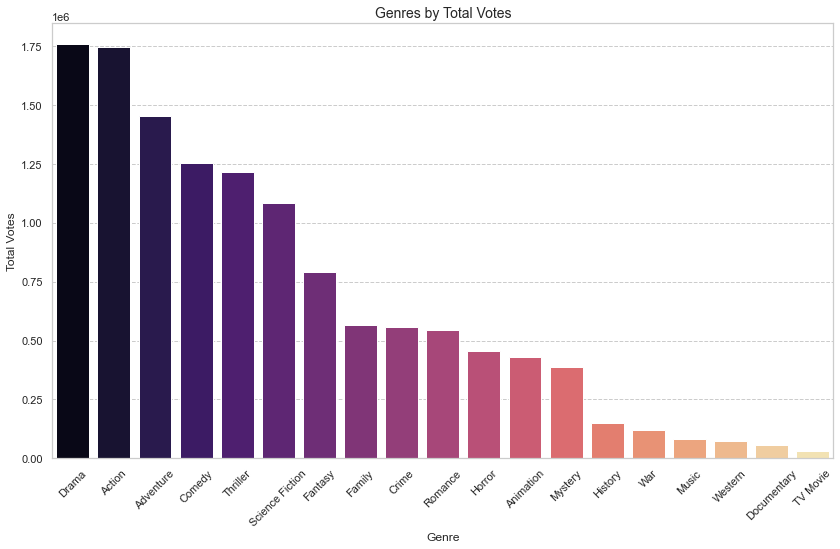

In [204]:
# investigating total votes vs genre names using tmdb
genre_analysis = tmdb_df_exploded.groupby('genre_names', as_index=False).agg({'vote_count': 'sum'})

# Sorting genres by total votes
most_voted_genres = genre_analysis.sort_values(by='vote_count', ascending=False)

# Plotting all genres
plt.figure(figsize=(14, 8))
sns.barplot(data=most_voted_genres, x='genre_names', y='vote_count', palette='magma', order=most_voted_genres['genre_names'])

plt.title('Genres by Total Votes', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Total Votes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

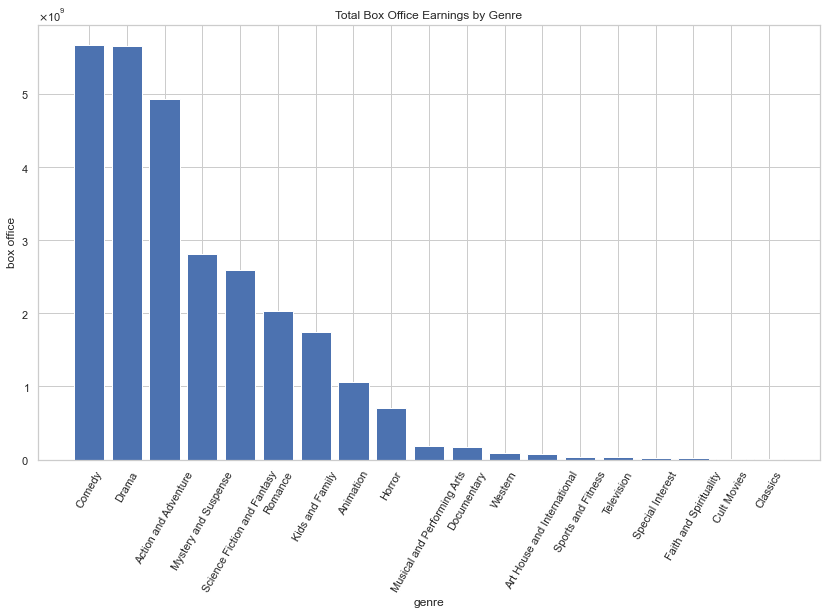

In [210]:
# assessing genre vs box_office revenue from rotten tomatoes
plt.figure(figsize=(14, 8))
plt.bar( genre_revenue['genre'], genre_revenue['box_office'])
plt.title('Total Box Office Earnings by Genre')
plt.xlabel('genre')
plt.ylabel('box office')
plt.xticks(rotation=60)
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.show()

Both sources indicate that 'Drama,' 'Comedy,' 'Action,' and 'Adventure' are the leading genres in terms of total vote counts and revenue generation. This suggests that focusing on these categories would likely yield the greatest benefits for the client.

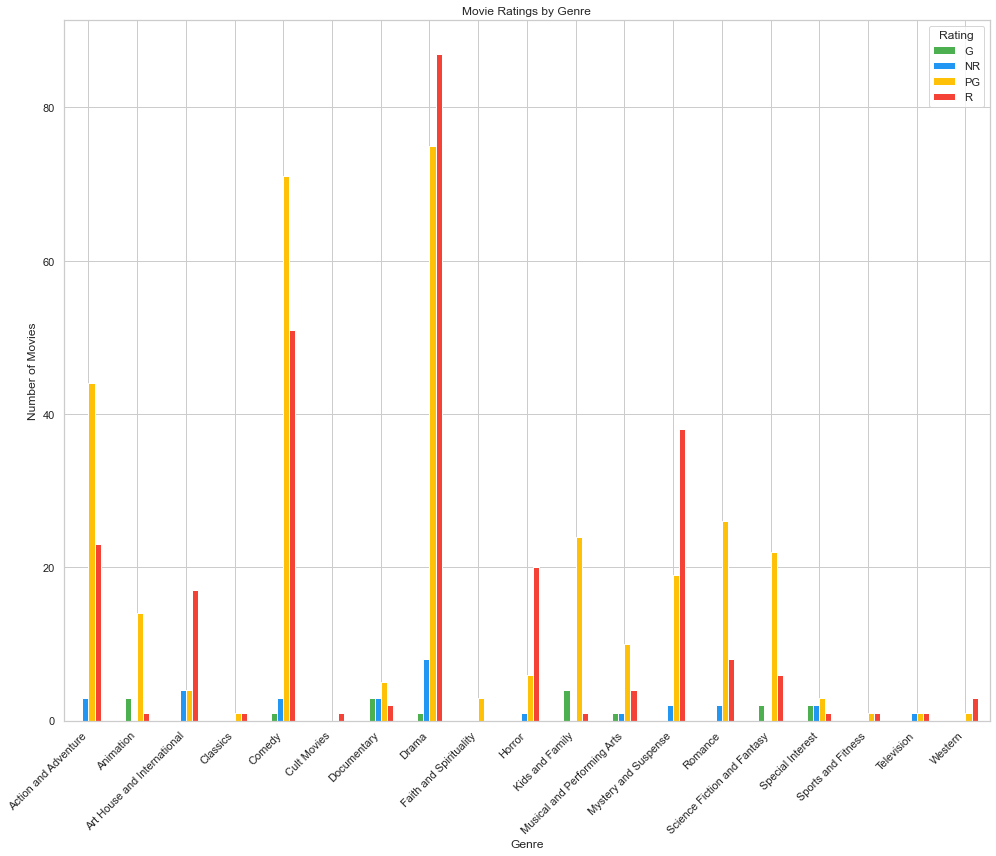

In [227]:
# visualising the spread of ratings per genre
rating_counts = rtinfo2.groupby(['genre', 'rating']).size().unstack(fill_value=0)
rating_counts.plot(kind='bar', stacked=False, figsize=(14, 12), color=['#4CAF50', '#2196F3', '#FFC107', '#F44336'])
plt.title('Movie Ratings by Genre')
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Rating')
plt.tight_layout()
plt.show()

It is evident that the PG and R rated movies are the most common in the industry.

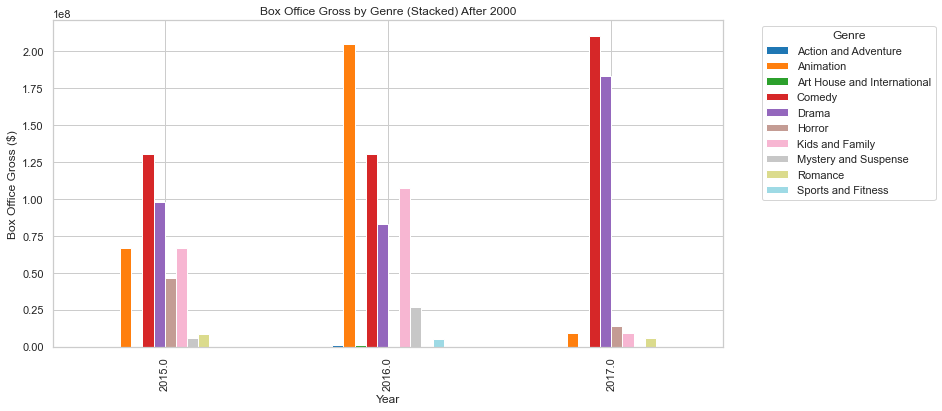

In [230]:
# checking the box office revenue per genre per year
filtered2_df = rtinfo2[rtinfo2['Theatre_Year'] > 2014]


pivot_df = filtered2_df.pivot_table(
    index='Theatre_Year', columns='genre', values='box_office', aggfunc='sum', fill_value=0
)

pivot_df.plot(kind='bar', stacked=False, figsize=(12, 6), cmap='tab20')
plt.title('Box Office Gross by Genre (Stacked) After 2000')
plt.ylabel('Box Office Gross ($)')
plt.xlabel('Year')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

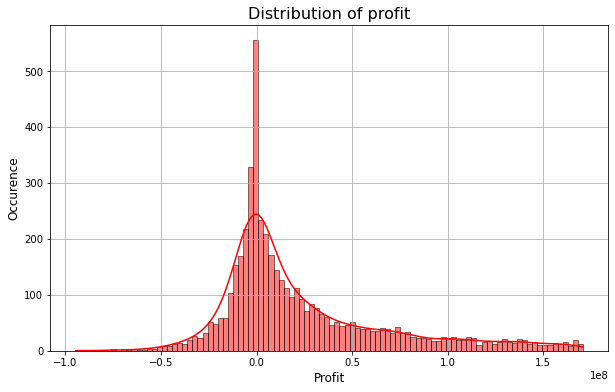

In [83]:
#checking the distribution of profit values using a histogram plot

plt.figure(figsize = (10, 6))
sns.histplot(data=tnbudgets_dfclean, x='profit', bins = 100, color = 'red', kde = True)
plt.title('Distribution of profit', fontsize=16)
plt.xlabel('Profit', fontsize=12)
plt.ylabel('Occurence', fontsize=12)
plt.grid(True)
plt.show()

The distribution appears fairly uniform, though the majority of the values fall toward the right side of the graph. This is a positive indicator as it indicates that more than 50% of movies make profit.

In [84]:
#using median to check for central tendency rather than mean due to the skew;
median_value = np.median(tnbudgets_dfclean['profit'])
median_value

6967251.0

The median profit amount is $6,967,251. This suggests that atleast half of the movies in the dataset are making profits above this value. Are there any notable trends that contribute to achieving high profits? First let us find out how the industry has been performing over the decades.

In [85]:
#creating a function for line plotting different columns

def plot_line(col_name, data_used):
    years = data_used.groupby('year')[col_name].sum().reset_index()

    #visualising the time series
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=years, x='year', y=col_name, marker='o', color = 'red')
    plt.title(f'Year vs {col_name.capitalize()}', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(col_name.capitalize(), fontsize=12)
    plt.grid(True)
    plt.show()

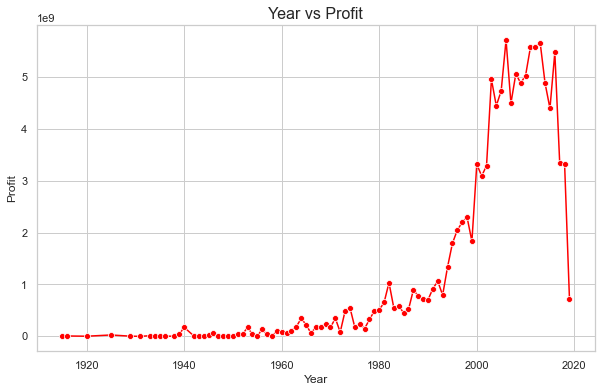

In [86]:
#line plot based on profits

plot_line('profit',tnbudgets_dfclean)

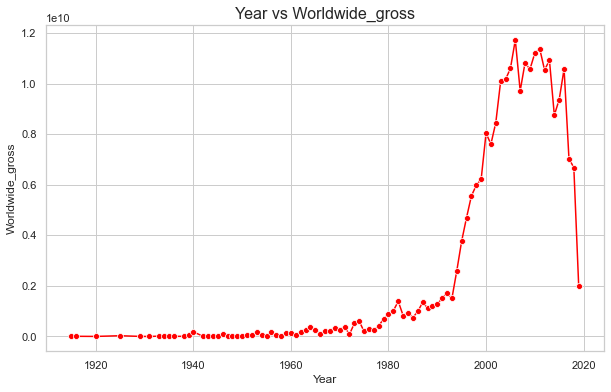

In [87]:
#line plot based on revenue

plot_line('worldwide_gross',tnbudgets_dfclean)

From the above plots, we can observe that the industry has grown increasingly popular from the 1980s through the 21st century. 
This trend shows a rising demand for movies, advancements in production, and the global expansion of the audience base. To solidify our deductions, let us first investigate if the production budget increased over the years; rather is there a positive correlation between production budget and years?

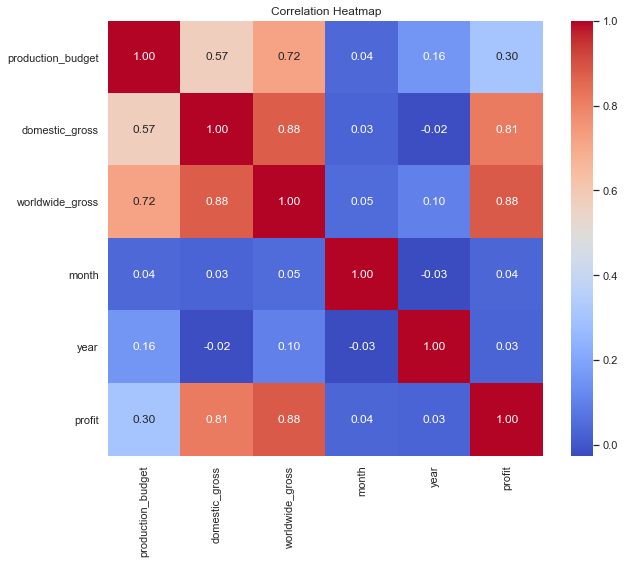

In [88]:
#using a heatmap to check the correlation between columns

#plotting
plt.figure(figsize=(10, 8))
sns.heatmap(tnbudgets_dfclean.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.show()



It is evident that gross revenue is strongly correlated with the production budget. To explore this further, let's first examine how production budgets have evolved over the years.

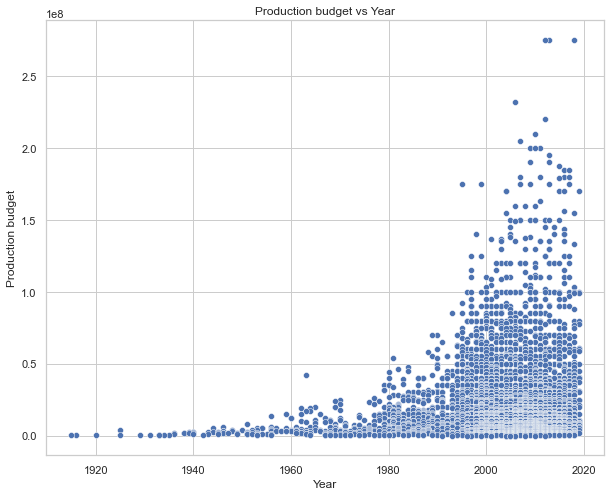

In [89]:
#visualising this correlation using a scatter plot

plt.figure(figsize=(10, 8))

# Scatter plot
sns.scatterplot(x=tnbudgets_dfclean['year'], y=tnbudgets_df['production_budget'])

# Labels and Title
plt.xlabel("Year")
plt.ylabel("Production budget")
plt.title("Production budget vs Year")

# Show the plot
plt.show()

We can clearly see that the production budget has been increasing over the years. This is may be because of the demand for high-quality visual effects. With this insight, we can ask: Do higher production budgets result in higher revenue? Have the majority of movies with a high production budget accrued good revenue? Using a linear regression, we can be able to determine how much variance in the revenue can be accredited to the production budget.

In [90]:
#creating a function for doing regressions

def regression(a,b):
#defining variables

    X = tnbudgets_dfclean[a]
    y = tnbudgets_dfclean[b]

    #adding constant

    model = sm.OLS(endog = y, exog = sm.add_constant(X))

    #fitting

    results = model.fit()

    #evaluation of the results
    print(results.summary())

In [91]:
#regression between production_budget and r_o_i
regression(['production_budget'], 'worldwide_gross')

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     5081.
Date:                Sun, 26 Jan 2025   Prob (F-statistic):               0.00
Time:                        01:15:32   Log-Likelihood:                -91518.
No. Observations:                4822   AIC:                         1.830e+05
Df Residuals:                    4820   BIC:                         1.831e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.233e+07   8.02e+0

Interpretation of the simple regression:
1. R-squared = 0.513 meaning that the variance of the revenue can be explained by the production budget 51% of the time. 
2. p-value =  0.00 which is less than 0.05 meaning that the model is statistically significant.
3. constant = 1.233e+07 means that when production budget is 0, estimated value of the revenue is 1.233e+07
4. coef = 1.4521 suggests that for every unit increase in the production budget, revenue increases by 1.4521 units.

The model confirms that higher production budgets are associated with higher worldwide gross revenues. On average, every dollar spent on production results in an additional $1.4521 in gross revenue.

Another intriguing question to consider is whether there are specific high seasons throughout the year for this industry. We can easily answer this using a bar plot.

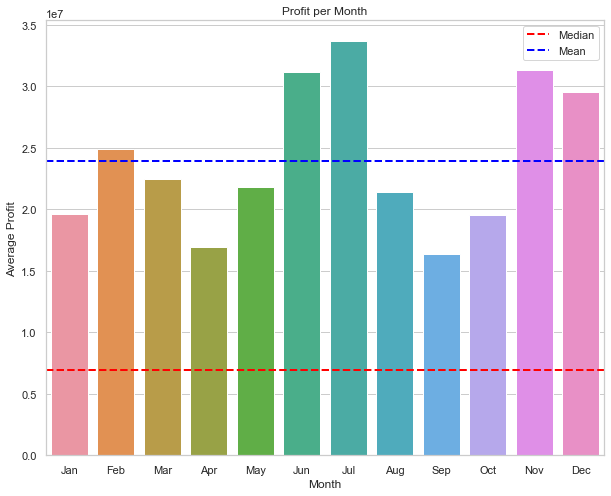

In [92]:
#grouping profit into months
profit_per_month = tnbudgets_dfclean.groupby('month')['profit'].mean().reset_index()

plt.figure(figsize=(10, 8))

# Bar plot
sns.barplot(x=profit_per_month['month'], y=profit_per_month['profit'])

# Labels and Title
plt.xlabel("Month")
plt.ylabel("Average Profit")
plt.title("Profit per Month")
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

#adding the line of central tendency
mean_value = np.mean(tnbudgets_dfclean['profit'])
plt.axhline(median_value, color='red', linestyle='dashed', linewidth=2, label = 'Median')
plt.axhline(mean_value, color='blue', linestyle='dashed', linewidth=2, label = 'Mean')
plt.legend()

# Show the plot
plt.show()



The industry appears to perform better than average in mid year, that is June and July, and end year in November and December. Therefore, it may be advisable for the client to schedule their release dates during these months to maximize potential returns.

What percentage of the worldwide gross is foreign gross? For this point, using the un-altered data is sensible because it provides a complete and accurate depiction of the relationship between foreign gross and worldwide gross, capturing both typical and extreme performances. Including outliers ensures that the analysis reflects the true diversity of the industry’s performance without bias. 

In [93]:
#adding column for foreign gross

tnbudgets_df['foreign_gross'] = tnbudgets_df['worldwide_gross'] - tnbudgets_df['domestic_gross']
tnbudgets_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year,profit,foreign_gross
0,2009-12-18,Avatar,425000000,760507625,-2147483648,12,2009,1722483648,1386976023
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,2011,635063875,804600000
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,6,2019,-200237650,107000000
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,5,2015,1072413963,944008095
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,2017,999721747,696540365
...,...,...,...,...,...,...,...,...,...
5775,2006-05-26,Cavite,7000,70071,71644,5,2006,64644,1573
5776,2004-12-31,The Mongol King,7000,900,900,12,2004,-6100,0
5778,1999-04-02,Following,6000,48482,240495,4,1999,234495,192013
5779,2005-07-13,Return to the Land of Wonders,5000,1338,1338,7,2005,-3662,0


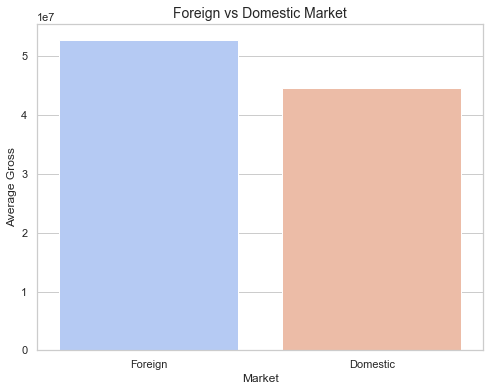

In [94]:
#visualising the comparison between the domestic and foerign market

average_foreign = tnbudgets_df['foreign_gross'].mean()
average_domestic = tnbudgets_df['domestic_gross'].mean()

#creating a dataframe for the purposes of plotting
avg_data = pd.DataFrame({
    'Market': ['Foreign', 'Domestic'],
    'Average Gross': [average_foreign, average_domestic]
})

#plotting
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_data, x='Market', y='Average Gross', palette = 'coolwarm',)
plt.title('Foreign vs Domestic Market', fontsize=14)
plt.xlabel('Market', fontsize=12)
plt.ylabel('Average Gross', fontsize=12)
plt.show()

From the above, we can clearly see that the foreign market is a great contributer in the industry. To solidify our second deduction of expansion of the audience base over the years leading to the rising trend in performance for the industry, let us see how the foreign markert has evolved over the years using a line plot

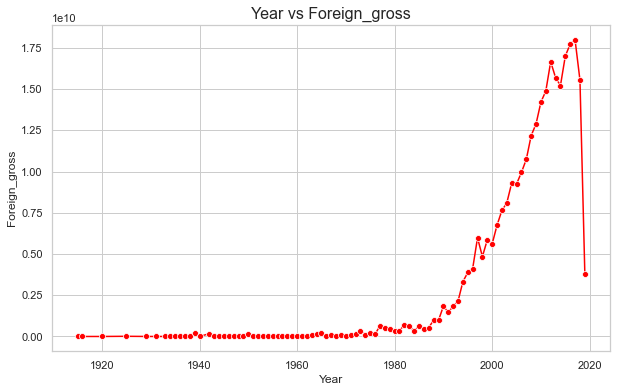

In [95]:
#lineplot of foreign_gross vs year

plot_line('foreign_gross', tnbudgets_df)